In [1]:
# adding white noise channels or all-zeros channels to MNIST

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [2]:
# training the same model on MNIST data with noise channels or allzero channels

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [3]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs = 10, 
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs = 10, 
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6936 - loss: 1.0976 - val_accuracy: 0.9105 - val_loss: 0.2982
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9114 - loss: 0.2818 - val_accuracy: 0.9457 - val_loss: 0.1812
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9466 - loss: 0.1791 - val_accuracy: 0.9425 - val_loss: 0.1899
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9618 - loss: 0.1268 - val_accuracy: 0.9542 - val_loss: 0.1525
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9712 - loss: 0.0902 - val_accuracy: 0.9619 - val_loss: 0.1240
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9791 - loss: 0.0655 - val_accuracy: 0.9554 - val_loss: 0.1487
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9849 - loss: 0.0482 - val_accuracy: 0.9606 - val_loss: 0.1366
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9885 - loss: 0.0359 - val_accu

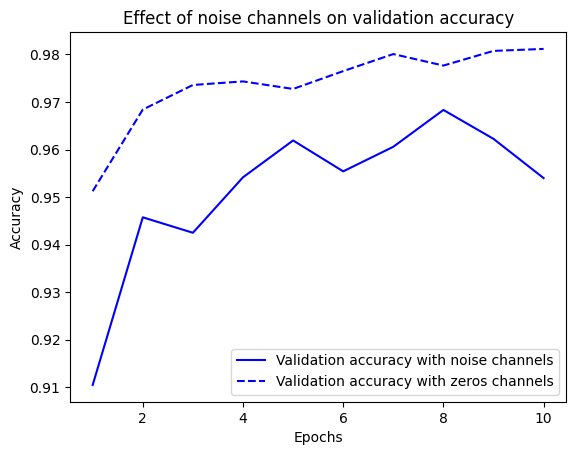

In [4]:
# plotting a validation accuracy comparison

import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [5]:
# fitting an mnist model with randomly shuffled labels

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 *28))
train_images = train_images.astype("float32") /255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1017 - loss: 2.3423 - val_accuracy: 0.1117 - val_loss: 2.3044
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1157 - loss: 2.2973 - val_accuracy: 0.1055 - val_loss: 2.3119
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1264 - loss: 2.2889 - val_accuracy: 0.1030 - val_loss: 2.3169
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1433 - loss: 2.2779 - val_accuracy: 0.0971 - val_loss: 2.3264
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1516 - loss: 2.2625 - val_accuracy: 0.0998 - val_loss: 2.3346
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1694 - loss: 2.2389 - val_accuracy: 0.1032 - val_loss: 2.3429
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1833 - loss: 2.2169 - val_accuracy: 0.1016 - val_loss: 2.3558
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2022 - loss: 2.1885 - val_acc

The manifold hypothesis implies that

- ML models only have to fit relatively simple, low-dim, highly structured subspaces within their potential input space(latent manifolds).

- Within one of these manifolds, it's always possible to interpolate between two inputs, that is to morph one into another via a continuous path along which all points fall on the manifold.